In [1]:
import re

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = [10, 8]

In [4]:
with open("section-2.2-exercise-2.19-data.txt", "r") as f:
    data = f.readlines()

In [5]:
times = {
    "DSC": np.zeros(len(data)//15, dtype=np.int),
    "ASC": np.zeros(len(data)//15, dtype=np.int),
    "RND": np.zeros(len(data)//15, dtype=np.int),
}

In [6]:
for observation in data:
    i = int(re.search(r"^\d+\b", observation).group())
    t = int(re.search(r"\breal time: (\d+)\b", observation).group(1))
    method = re.search(r"^\d+ (\w{3})\b", observation).group(1)
    
    times[method][i] += t

In [7]:
times = pd.DataFrame(times)

In [8]:
times.head(), times.tail()

(   DSC  ASC  RND
 0    0    0    0
 1    0    0    0
 2    0    0    0
 3    0    0    0
 4    0    0    0,
        DSC     ASC    RND
 196  32178  136065  42963
 197  33227  139057  44581
 198  33807  144241  45837
 199  35120  148390  47312
 200  36980  153939  49228)

In [9]:
times //= 5

In [10]:
times.head(), times.tail()

(   DSC  ASC  RND
 0    0    0    0
 1    0    0    0
 2    0    0    0
 3    0    0    0
 4    0    0    0,
       DSC    ASC   RND
 196  6435  27213  8592
 197  6645  27811  8916
 198  6761  28848  9167
 199  7024  29678  9462
 200  7396  30787  9845)

In [11]:
times["ascending_ratio"] = times["ASC"] / times["DSC"]
times["random_ratio"] = times["RND"] / times["DSC"]

<AxesSubplot:>

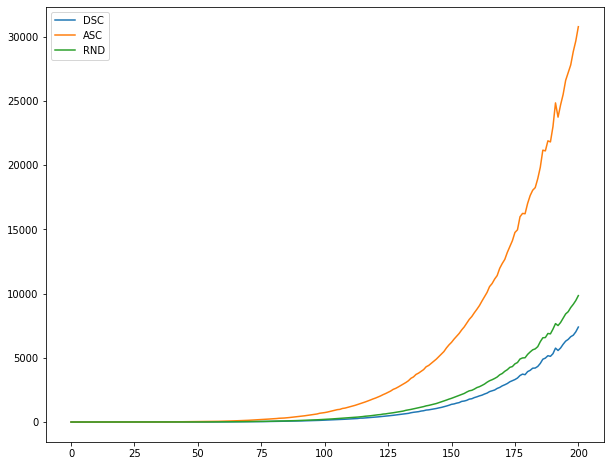

In [12]:
times[["DSC", "ASC", "RND"]].plot()

<AxesSubplot:>

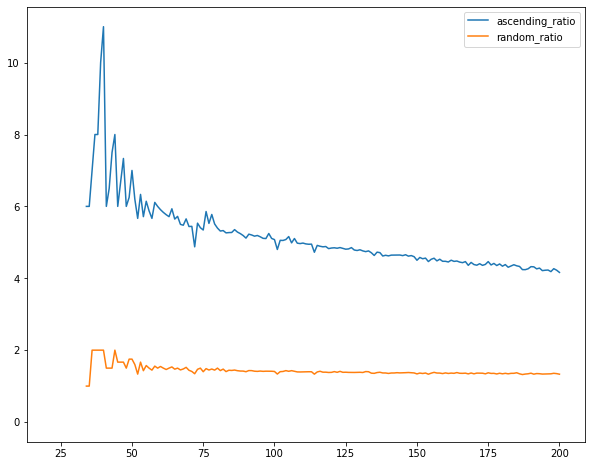

In [13]:
times[["ascending_ratio", "random_ratio"]].plot()

In [14]:
print("Average ratio of Ascending processing time to descending processing time: ", times["ascending_ratio"][times["ascending_ratio"] != np.inf].mean(axis=0))
print("Average ratio of Randomized processing time to descending processing time: ", times["random_ratio"][times["random_ratio"] != np.inf].mean(axis=0))

Average ratio of Ascending processing time to descending processing time:  5.102198727266894
Average ratio of Randomized processing time to descending processing time:  1.4151400894538526
